In [16]:
import numpy as np
import pandas as pd
import os

In [17]:
data = pd.read_csv(r"C:\Users\Dell\PyhtonIA\Machine Learning\Clasificacion\churn.csv")


# Análisis Exploratorio de Datos (EDA)

In [5]:
data.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Nombres de las variables (columnas):

In [6]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

Tipos de los datos almacenados en cada variable:

In [7]:
data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn              object
dtype: object

**Decripción** estadística de los datos

In [8]:
descripcion_data = data.describe(include="all").T
print(descripcion_data)

                 count unique       top  freq        mean        std    min  \
State             3333     51        WV   106         NaN        NaN    NaN   
Account Length  3333.0    NaN       NaN   NaN  101.064806  39.822106    1.0   
Area Code       3333.0    NaN       NaN   NaN  437.182418   42.37129  408.0   
Phone             3333   3333  382-4657     1         NaN        NaN    NaN   
Int'l Plan        3333      2        no  3010         NaN        NaN    NaN   
VMail Plan        3333      2        no  2411         NaN        NaN    NaN   
VMail Message   3333.0    NaN       NaN   NaN     8.09901  13.688365    0.0   
Day Mins        3333.0    NaN       NaN   NaN  179.775098  54.467389    0.0   
Day Calls       3333.0    NaN       NaN   NaN  100.435644  20.069084    0.0   
Day Charge      3333.0    NaN       NaN   NaN   30.562307   9.259435    0.0   
Eve Mins        3333.0    NaN       NaN   NaN  200.980348  50.713844    0.0   
Eve Calls       3333.0    NaN       NaN   NaN  100.1

Valores perdidos

In [9]:
data.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

In [10]:
if  not data.isnull().any().any():
  print("No hay valores nulos")

No hay valores nulos


Tras comprobar que no existen valores perdidos analizamos las variables.
- El objetivo es determinar si todas las variables son utiles para la modelizacion.
- Hay una serie de variables que no nos proporcionan informacion.
- El estado en el que vive un cliente no aporta informacion sobre su comportamiento.


In [11]:
# Están los 51 estados de EEUU
len(data['State'].value_counts())

51

- Lo mismo ocurre con los codigos identificativos y con el número de telefono.
- Eliminamos esas variables

In [ ]:
# Ejecutar esta celda sólo una vez. La segunda vez daria error por no existir las columnas ya eliminadas
del data['State']
del data['Account Length']
del data['Area Code']
del data['Phone']

- El resto de las variables pueden ser relevantes para el análisis.
- Tenemos variables numéricas y variables categóricas.
- Las variables categóricas deben ser **binomializadas**.
- En este caso dado que las variables solo toman dos opciones se puede hacer "a mano".

Crear una nueva columna de ceros

In [12]:
data.loc[:, "IntPlan"] = 0

Si tiene Plan Internacional -> 1

In [13]:
data.loc[data["Int'l Plan"] == "yes", "IntPlan"] = 1

In [14]:
data["Int'l Plan"] == "yes"

0       False
1       False
2       False
3        True
4        True
        ...  
3328    False
3329    False
3330    False
3331     True
3332    False
Name: Int'l Plan, Length: 3333, dtype: bool

In [15]:
#data["IntPlan"] = data["Int'l Plan"] == "yes"

In [16]:
# data["IntPlan"] =data["IntPlan"].astype('int')

In [ ]:
data = data.drop("Int'l Plan", axis = 1)
data.head()

,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,IntPlan
0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,1
4,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,1


Si tuviesemos más categorí­as, hacer esto a mano seria mucho trabajo.<br>
Con la funcion *get_dummies* creamos un nuevo conjunto de datos en el que cada posible opción de una variable pasa a ser una variable dummy.

In [18]:
vmailplan2 = pd.get_dummies(data['VMail Plan'])

In [ ]:
#data["vmailplan"] = data['VMail Plan']=="yes"
#data.head()

In [20]:
vmailplan2 = pd.get_dummies(data['VMail Plan'])
print(vmailplan2)

         no    yes
0     False   True
1     False   True
2      True  False
3      True  False
4      True  False
...     ...    ...
3328  False   True
3329   True  False
3330   True  False
3331   True  False
3332  False   True

[3333 rows x 2 columns]


In [21]:
churn2 = pd.get_dummies(data['Churn'])
print(churn2)

      False.  True.
0       True  False
1       True  False
2       True  False
3       True  False
4       True  False
...      ...    ...
3328    True  False
3329    True  False
3330    True  False
3331    True  False
3332    True  False

[3333 rows x 2 columns]


Una vez que ya hemos hecho la transformacion juntamos todas las variables en un data frame.

In [15]:
datosfinal = pd.concat([data, vmailplan2["yes"], churn2["True."]], axis=1)

NameError: name 'pd' is not defined

In [23]:
datosfinal.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,IntPlan,yes,True.
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False.,0,True,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False.,0,True,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False.,0,False,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False.,1,False,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False.,1,False,False


In [24]:
del datosfinal['Churn']
del datosfinal['VMail Plan']

In [25]:
datosfinal = datosfinal.rename(columns={'yes': 'VmailPlan'})
datosfinal = datosfinal.rename(columns={'True.': 'Churn'})

In [26]:
datosfinal.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan,Churn
0,KS,128,415,382-4657,no,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,True,False
1,OH,107,415,371-7191,no,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,True,False
2,NJ,137,415,358-1921,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,False,False
3,OH,84,408,375-9999,yes,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,False,False
4,OK,75,415,330-6626,yes,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,1,False,False
5,AL,118,510,391-8027,yes,0,223.4,98,37.98,220.6,...,203.9,118,9.18,6.3,6,1.70,0,1,False,False
6,MA,121,510,355-9993,no,24,218.2,88,37.09,348.5,...,212.6,118,9.57,7.5,7,2.03,3,0,True,False
7,MO,147,415,329-9001,yes,0,157.0,79,26.69,103.1,...,211.8,96,9.53,7.1,6,1.92,0,1,False,False
8,LA,117,408,335-4719,no,0,184.5,97,31.37,351.6,...,215.8,90,9.71,8.7,4,2.35,1,0,False,False
9,WV,141,415,330-8173,yes,37,258.6,84,43.96,222.0,...,326.4,97,14.69,11.2,5,3.02,0,1,True,False


In [27]:
datosfinal.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
IntPlan             int64
VmailPlan            bool
Churn                bool
dtype: object

# Primera separación Train-Test

Para esta primera modelizacion hacemos la siguiente particion:
- Para entrenar el algoritmo: 3000 observaciones
- Para testear el algoritmo 333 observaciones

In [29]:
train_data = datosfinal[:3000]
test_data = datosfinal[3000:]

In [30]:
train_data_X = train_data.drop(['Churn'], axis=1)
train_data_y = train_data['Churn']

In [31]:
test_data_X = test_data.drop(['Churn'], axis=1)
test_data_y = test_data['Churn']

# Regresión logística 1

## Creamos el modelo

In [32]:
from sklearn.linear_model import LogisticRegression
RegLog = LogisticRegression(C=1.0,
                            class_weight=None,
                            dual=False,
                            fit_intercept=True,
                            intercept_scaling=1,
                            max_iter=100,
                            multi_class='ovr',
                            n_jobs=1,
                            penalty='l2',
                            random_state=None,
                            solver='liblinear',
                            tol=0.0001,
                            verbose=0,
                            warm_start=False)


## Entrenamos el modelo con los datos de train.

Los coeficientes obtenidos (RegLog.coef_) te proporcionan información sobre la relación entre las variables independientes y la probabilidad de la clase objetivo.

Interpretación de los coeficientes (RegLog.coef_)
Coeficientes 𝛽:

Cada coeficiente 𝛽 en RegLog.coef_ corresponde a una de las características (variables independientes) en los datos de entrenamiento (train_data_X).
Estos coeficientes indican la magnitud y dirección del efecto de cada característica en la probabilidad de que la observación pertenezca a la clase positiva (por ejemplo, clase 1).
Signo de los coeficientes:

Si el coeficiente es positivo indica que un aumento en el valor de esa característica está asociado mayor probabilidad de que la observación pertenezca a la clase positiva. Si es negativo indica lo contrario


In [34]:
# Verificar qué columnas tenemos y sus tipos
print("Columnas en train_data_X:")
print(train_data_X.columns.tolist())
print("\nTipos de datos:")
print(train_data_X.dtypes)

# Verificar si hay valores no numéricos
print("\nPrimeras filas para identificar problemas:")
print(train_data_X.head())

# Filtrar solo columnas numéricas y booleanas
X_numeric = train_data_X.select_dtypes(include=[np.number, 'bool'])
print(f"\nColumnas numéricas seleccionadas: {X_numeric.columns.tolist()}")
print(f"Forma de X_numeric: {X_numeric.shape}")

# Verificar si hay valores faltantes
print(f"\nValores faltantes en X_numeric: {X_numeric.isnull().sum().sum()}")

# Entrenar el modelo con datos limpios
RegLog.fit(X_numeric, train_data_y)
print("\n✅ Modelo entrenado exitosamente")

# Mostrar coeficientes
print(f"\nCoeficientes del modelo: {RegLog.coef_}")
print(f"Número de características: {len(RegLog.coef_[0])}")

Columnas en train_data_X:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'IntPlan', 'VmailPlan']

Tipos de datos:
State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
IntPlan             int64
VmailPlan            bool
dtype: object

Primeras filas para identificar problemas:
  State  Account Length  Area Code     Phone Int'l Plan  VMail Me

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
datosfinal.shape

(3333, 17)

## Hacemos la predicción con los datos de test:

In [36]:
# Hacer predicciones en el conjunto de test
# Primero aplicamos el mismo filtro de columnas numéricas al conjunto de test
test_data_X_numeric = test_data_X.select_dtypes(include=[np.number, 'bool'])

# Asegurar que las columnas coincidan entre train y test
# Reordenar las columnas del test para que coincidan con train
test_data_X_numeric = test_data_X_numeric[X_numeric.columns]

print(f"Columnas en test: {test_data_X_numeric.columns.tolist()}")
print(f"Forma del conjunto de test: {test_data_X_numeric.shape}")

# Hacer la predicción
prediccion = RegLog.predict(test_data_X_numeric)
print(f"Predicciones realizadas: {len(prediccion)}")
print(f"Clases predichas: {np.unique(prediccion, return_counts=True)}")

Columnas en test: ['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'IntPlan', 'VmailPlan']
Forma del conjunto de test: (333, 18)
Predicciones realizadas: 333
Clases predichas: (array([False,  True]), array([315,  18]))


In [ ]:
prediccion

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [41]:
# Calcular la precisión del modelo
precision = RegLog.score(test_data_X_numeric, test_data_y)
print(f"Precisión del modelo: {precision:.4f}")
print(f"Precisión en porcentaje: {precision*100:.2f}%")

# Información adicional sobre las predicciones
print(f"\nDistribución de clases reales:")
print(f"Clase False (No Churn): {(test_data_y == False).sum()}")
print(f"Clase True (Churn): {(test_data_y == True).sum()}")

print(f"\nDistribución de predicciones:")
print(f"Predicho False (No Churn): {(prediccion == False).sum()}")
print(f"Predicho True (Churn): {(prediccion == True).sum()}")

Precisión del modelo: 0.8649
Precisión en porcentaje: 86.49%

Distribución de clases reales:
Clase False (No Churn): 286
Clase True (Churn): 47

Distribución de predicciones:
Predicho False (No Churn): 315
Predicho True (Churn): 18


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def cuadro_matriz_confusion(confusion):
    fig, ax = plt.subplots()

    labels = ['Verdadero Neg', 'Falso Pos', 'Falso Neg', 'Verdadero Pos']
    categories = ['0', '1']
    counts = ['{0:,}'.format(value) for value in confusion.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in confusion.flatten() / np.sum(confusion)]
    labels = [f'{label}\n{count}\n{percentage}' for label, count, percentage in zip(labels, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax)
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.title('Matriz de confusión')
    plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_y, prediccion)

array([[278,   8],
       [ 37,  10]])

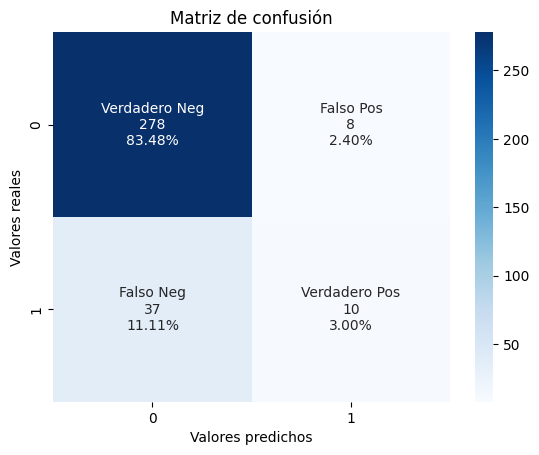

In [49]:
cuadro_matriz_confusion(confusion_matrix(test_data_y, prediccion))

*Dado que no tenemos el mismo número de valores positivos que de negativos en la variable objetivo, repetimos la regresión logística con los pesos balanceados* De esta manera se le dará más importancia a la detección de la clase más escasa

# Regresión logística 2
## Modelo con los pesos balanceados
`class_weight = 'balanced'`

In [ ]:
RegLog = LogisticRegression(C=1.0,
                            class_weight='balanced',
                            dual=False,
                            fit_intercept=True,
                            intercept_scaling=1,
                            max_iter=100,
                            multi_class='ovr',
                            n_jobs=1,
                            penalty='l2',
                            random_state=None,
                            solver='liblinear',
                            tol=0.0001,
                            verbose=0,
                            warm_start=False)

Aplicamos el modelo a los datos de train

RegLog.fit(train_data_X, train_data_y)
RegLog.coef_

In [ ]:
RegLog.fit(train_data_X, train_data_y)
RegLog.coef_

array([[ 2.78410395e-02,  2.36218415e-02, -5.26057609e-04,
        -6.92284673e-02,  1.36424950e-02, -2.90617134e-05,
        -9.51883956e-02,  3.75343300e-03, -1.93817241e-03,
        -1.97743102e-02,  2.33768504e-02, -6.20867753e-02,
         1.19934531e-01,  5.43773468e-01,  2.22987695e+00,
        -1.64136600e+00]])

Realizamos la prediccion sobre los datos de test

In [ ]:
prediccion = RegLog.predict(test_data_X)

Hemos perdido bastante en precisión...

Comprobamos la precision del modelo con respecto a los datos de testeo.

In [ ]:
precision = RegLog.score(test_data_X, test_data_y)

In [ ]:
print(precision)

0.7867867867867868


Pero hemos ganado en sensibilidad. Detectamos muchos más usuarios que tienen pensado cambiarse de compañía de teléfonos.<br>
A cambio cometemos más error del tipo "pensar que el usuario se quiere ir cuando realmente no tenía intención de hacerlo"

In [ ]:
confusion = confusion_matrix(test_data_y, prediccion)

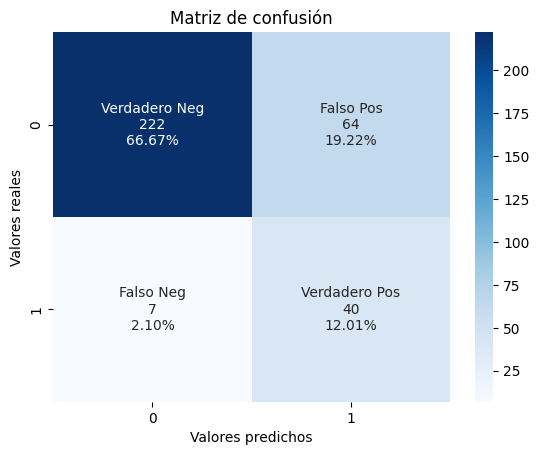

In [ ]:
cuadro_matriz_confusion(confusion)

In [ ]:
def resumen_metricas(confusion, y_test):
    # Calcular las tasas de precisión, sensibilidad, especificidad y valor predictivo positivo
    accuracy = (confusion[0, 0] + confusion[1, 1]) / len(y_test)
    recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    ppv = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])

    # Mostrar las tasas de precisión, sensibilidad, especificidad y valor predictivo positivo
    print("Precisión (Accuracy):", accuracy)
    print("Sensibilidad (Recall):", recall)
    print("Especificidad:", specificity)
    print("Valor Predictivo Positivo (PPV):", ppv)

resumen_metricas(confusion, test_data_y)

Precisión (Accuracy): 0.7867867867867868
Sensibilidad (Recall): 0.851063829787234
Especificidad: 0.7762237762237763
Valor Predictivo Positivo (PPV): 0.38461538461538464


# Repetimos el proceso NORMALIZANDO los datos

El primer paso para la normalización es ver el formato que tienen los datos

In [42]:
# El primer punto es ver el formato que tienen los datos
datosfinal.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
IntPlan             int64
VmailPlan            bool
Churn                bool
dtype: object

In [ ]:
datosfinal.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,True,False
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,True,False
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,False,False
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,False,False
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,False,False


In [50]:
from sklearn.preprocessing import StandardScaler

# Primero verificamos qué columnas tenemos y sus tipos
print("Columnas en datosfinal:")
print(datosfinal.columns.tolist())
print("\nTipos de datos:")
print(datosfinal.dtypes)

# Identificar columnas numéricas que se pueden normalizar
# Excluir las columnas booleanas/categóricas (IntPlan, VmailPlan, Churn)
columnas_a_normalizar = datosfinal.select_dtypes(include=[np.number]).columns.tolist()

# Remover las columnas booleanas/categóricas que no deben normalizarse
columnas_excluir = ['IntPlan', 'VmailPlan', 'Churn']
columnas_a_normalizar = [col for col in columnas_a_normalizar if col not in columnas_excluir]

print(f"\nColumnas que se van a normalizar: {columnas_a_normalizar}")

# Aplicar normalización solo a las columnas numéricas
ss = StandardScaler()
datos_a_normalizar = datosfinal[columnas_a_normalizar]
datosfinal_sin_columnas = ss.fit_transform(datos_a_normalizar)
datos_normalizados = pd.DataFrame(datosfinal_sin_columnas, columns=columnas_a_normalizar)

# Agregar las columnas booleanas/categóricas sin normalizar
for col in columnas_excluir:
    if col in datosfinal.columns:
        datos_normalizados[col] = datosfinal[col].values

print(f"\nForma final de datos_normalizados: {datos_normalizados.shape}")
datos_normalizados.head(20)

Columnas en datosfinal:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'IntPlan', 'VmailPlan', 'Churn']

Tipos de datos:
State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
IntPlan             int64
VmailPlan            bool
Churn                bool
dtype: object

Columnas que se van a normalizar: ['Account Length', 'Area Code', 'VMail Me

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan,Churn
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0,True,False
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0,True,False
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0,False,False
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1,False,False
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1,False,False
5,0.425335,1.718817,-0.591760,0.801056,-0.121381,0.801216,0.386928,0.044463,0.386648,0.059881,0.914473,0.061821,-1.410498,0.617898,-1.412550,-1.188218,1,False,False
6,0.500681,1.718817,1.161817,0.705572,-0.619735,0.705083,2.909300,0.395875,2.908677,0.231933,0.914473,0.233209,-0.980610,1.024263,-0.974686,1.092641,0,True,False
7,1.153683,-0.523603,-0.591760,-0.418205,-1.068253,-0.418264,-1.930341,-0.306949,-1.931206,0.216112,-0.209945,0.215631,-1.123906,0.617898,-1.120641,-1.188218,1,False,False
8,0.400220,-0.688834,-0.591760,0.086760,-0.171217,0.087242,2.970436,-1.009773,2.971322,0.295216,-0.516604,0.294733,-0.550721,-0.194831,-0.550091,-0.427932,0,False,False
9,1.002990,-0.523603,2.111671,1.447412,-0.819076,1.447141,0.414538,0.546480,0.414490,2.482445,-0.158835,2.483233,0.344880,0.211534,0.338904,-1.188218,1,True,False


Todas las variables (columnas) son cantidades excepto IntPlan, VmailPlan y Churn.<br>
Este tipo de variables categóricas no deben normalizarse, por lo que rescatamos su valor de la matriz de datos original:

In [54]:
datos_normalizados['IntPlan'] = datosfinal['IntPlan']
datos_normalizados['VmailPlan'] = datosfinal['VmailPlan']
datos_normalizados['Churn'] = datosfinal['Churn']
datos_normalizados.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan,Churn
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0,True,False
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0,True,False
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0,False,False
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1,False,False
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1,False,False


Vamos a preparar los datos para entrenar y evaluar el modelo utilizando la biblioteca scikit-learn (sklearn) en Python.

Aquí es lo que está haciendo cada línea:

La función `train_test_split` se utiliza para dividir los datos en conjuntos de entrenamiento y prueba de manera aleatoria.

Podría ser que las condiciones de medida de los registros de mi dataset fueran distintos en la parte baja de la tabla a las condiciones en la parte alta.

Por ello es conveniente "barajar" aleatoriamente las filas.

`random_state=42`: establece una semilla aleatoria para garantizar la reproducibilidad de la división de los datos

In [55]:
from sklearn.model_selection import train_test_split
y = datos_normalizados['Churn']
X = datos_normalizados.drop('Churn', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
X_train

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,IntPlan,VmailPlan
367,-1.408093,-0.523603,-0.591760,-1.865159,1.323844,-1.865654,1.033791,0.395875,1.033976,1.070436,-0.005505,1.072574,2.780916,-0.601195,2.780325,-0.427932,0,False
3103,0.349989,-0.523603,-0.591760,0.296091,0.526479,0.295710,0.513145,0.395875,0.514257,2.221401,0.658924,2.219559,1.061361,-1.413924,1.055408,0.332354,0,False
549,0.500681,-0.688834,1.673277,1.052621,-1.865619,1.052889,0.091106,0.847691,0.091986,-0.082506,-0.772154,-0.083200,-0.049184,0.211534,-0.045885,1.852927,0,True
2531,1.982493,-0.523603,-0.591760,-0.669769,1.672692,-0.669937,-0.403902,0.646884,-0.404532,-0.329707,-0.669934,-0.329297,-0.049184,-0.194831,-0.045885,-0.427932,0,False
2378,0.274642,1.718817,-0.591760,0.485224,1.074667,0.484734,-0.719445,-0.306949,-0.720075,-1.197875,0.045605,-1.199423,0.846417,1.024263,0.843111,1.092641,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.123950,1.718817,-0.591760,1.737537,0.974997,1.737699,-0.046944,-0.909370,-0.047225,-0.792466,-1.947682,-0.790727,-1.517970,-0.601195,-1.518698,-0.427932,0,False
1130,0.525797,-0.523603,-0.591760,-2.656577,-1.915454,-2.656317,-0.397986,-0.557958,-0.397571,1.003198,-2.152122,1.002260,0.882241,-1.007560,0.882917,-0.427932,0,False
1294,-0.880668,-0.688834,-0.591760,-1.692553,-1.217759,-1.692831,1.203395,0.546480,1.203349,-0.321796,1.272243,-0.320508,-0.371601,0.211534,-0.377599,-0.427932,0,False
860,1.706223,-0.523603,-0.591760,-0.010560,0.526479,-0.011051,-0.508426,1.500313,-0.508940,0.548349,-0.414384,0.549619,-0.120832,0.617898,-0.125496,0.332354,0,False


Podemos comprobar que la media es aproximadamente 0 y la desviación típica es aproximadamente 1 en todas las características (excepto en las booleanas que hemos rescatado)

In [57]:
X_train.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Account Length,2499.0,NaN,NaN,NaN,-0.013748,0.992962,-2.513172,-0.70486,-0.026743,0.651374,3.288496
Area Code,2499.0,NaN,NaN,NaN,-0.015726,0.99141,-0.688834,-0.688834,-0.523603,-0.523603,1.718817
VMail Message,2499.0,NaN,NaN,NaN,-0.008287,0.998101,-0.59176,-0.59176,-0.59176,0.796489,3.134591
Day Mins,2499.0,NaN,NaN,NaN,0.004238,0.992617,-3.253354,-0.658752,-0.008724,0.670684,3.140422
Day Calls,2499.0,NaN,NaN,NaN,0.000166,0.994809,-3.510186,-0.619735,0.028125,0.675985,3.217588
Day Charge,2499.0,NaN,NaN,NaN,0.004233,0.992618,-3.253636,-0.659136,-0.00889,0.670519,3.140803
Eve Mins,2499.0,NaN,NaN,NaN,-0.002139,0.998469,-3.963622,-0.683946,0.000388,0.663028,3.209066
Eve Calls,2499.0,NaN,NaN,NaN,-0.008491,1.007742,-5.025911,-0.658361,-0.005739,0.671985,3.508382
Eve Charge,2499.0,NaN,NaN,NaN,-0.002134,0.998471,-3.963679,-0.684113,0.001499,0.662748,3.20798
Night Mins,2499.0,NaN,NaN,NaN,-0.004964,1.005616,-3.513648,-0.674799,0.004508,0.683815,3.839081


# Regresión Logística 3 con datos normalizados aleatorios y balanceados

In [58]:
RegLog = LogisticRegression(C=1.0,
                            class_weight='balanced',
                            dual=False,
                            fit_intercept=True,
                            intercept_scaling=1,
                            max_iter=100,
                            multi_class='ovr',
                            n_jobs=1,
                            penalty='l2',
                            random_state=None,
                            solver='liblinear',
                            tol=0.0001,
                            verbose=0,
                            warm_start=False)

# Aplicamos el modelo a los datos de train

RegLog.fit(X_train, y_train)
RegLog.coef_

# Realizamos la prediccion sobre los datos de test
prediccion = RegLog.predict(X_test)

# Comprobamos la precision del modelo con respecto a los datos de testeo.
precision = RegLog.score(X_test, y_test)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print(precision)

0.7805755395683454


In [ ]:
confusion = confusion_matrix(y_test, prediccion)

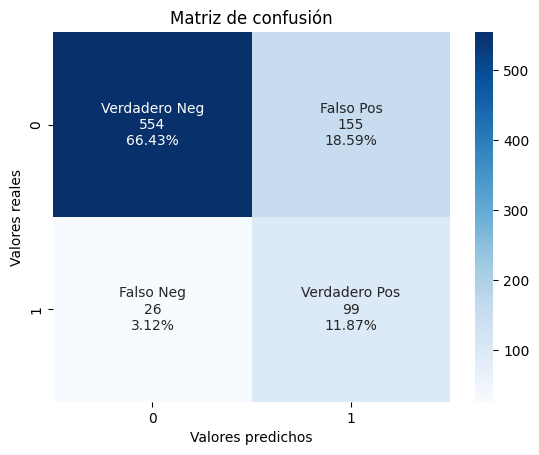

In [ ]:
cuadro_matriz_confusion(confusion)

In [ ]:
resumen_metricas(confusion, y_test)

Precisión (Accuracy): 0.7829736211031175
Sensibilidad (Recall): 0.792
Especificidad: 0.7813822284908322
Valor Predictivo Positivo (PPV): 0.38976377952755903


# KNeighborsClassifier

El valor de k se puede ajustar para mejorar el rendimiento del modelo. Si se establece k en 1, el modelo utilizará solo el vecino más cercano para la predicción, pero esto puede llevar a un sobreajuste del modelo, ya que el modelo puede estar demasiado ajustado a los datos de entrenamiento.

En cambio, si se establece k en un valor demasiado grande, el modelo puede no ser lo suficientemente sensible a los detalles del conjunto de datos.

*No podemos obtener el óptimo de vecinos por el método del codo de KMeans ya que KMeans es un método para datos sin etiquetar (no supervisados)*

Además, antes de aplicar `KNeighborsClassifier`, se recomienda normalizar los datos, ya que la distancia entre los puntos de datos es un factor importante en este algoritmo. La normalización asegura que los puntos de datos tengan la misma escala y no se vean afectados por los diferentes rangos de valores.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# Creamos el modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn = KNeighborsClassifier(algorithm='auto',
                           leaf_size=30,
                           metric='minkowski',
                           metric_params=None,
                           n_jobs=1,
                           n_neighbors=5,
                           p=2,
                           weights='uniform')


knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,1


In [ ]:
prediccion = knn.predict(X_test)
print(prediccion)

[False False  True False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [ ]:
confusion = confusion_matrix(y_test, prediccion)

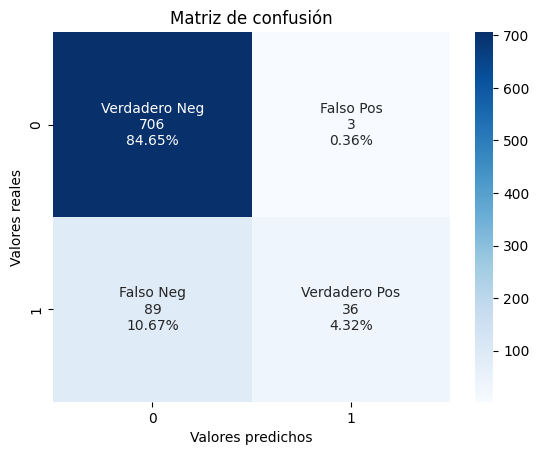

In [ ]:
cuadro_matriz_confusion(confusion)

In [ ]:
resumen_metricas(confusion, y_test)

Precisión (Accuracy): 0.8896882494004796
Sensibilidad (Recall): 0.288
Especificidad: 0.995768688293371
Valor Predictivo Positivo (PPV): 0.9230769230769231


**Precisión (Accuracy)**: KNearestNeighbours tiene una precisión significativamente mayor que la Regresión Logística anterior, lo que indica que KNearestNeighbours clasifica correctamente un mayor porcentaje de instancias.<br>
**Sensibilidad (Recall)**: Aunque Regresión Logística tiene una sensibilidad más alta, KNearestNeighbours muestra una especificidad mucho mayor, lo que sugiere que es mejor identificando verdaderos negativos.<br>
**Valor Predictivo Positivo (PPV)**: KNearestNeighbours tiene un valor predictivo positivo mucho más alto, lo que indica que cuando predice la clase positiva, es más probable que sea correcta.

# Naïve Bayes
Utiliza la probabilidad condicional para predecir la etiqueta de clase de un nuevo punto de datos.

La probabilidad condicional es la probabilidad de que un evento ocurra, dado que otro evento ya ha ocurrido. En el caso de Naive Bayes, la probabilidad condicional se utiliza para calcular la probabilidad de que un punto de datos pertenezca a una determinada clase, dadas sus características.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Sin validación cruzada

Una forma de determinar la fiabilidad de los modelos es la validacion cruzada.

Este sistema hace varias particiones de los datos para fijar train y test.

In [14]:
y = datosfinal['Churn']
X = datosfinal.drop('Churn', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

NameError: name 'datosfinal' is not defined

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
prediccion = gnb.predict(X_test)
accuracy = accuracy_score(y_test, prediccion)
print("Accuracy:", accuracy)

Accuracy: 0.8525179856115108


In [ ]:
confusion = confusion_matrix(y_test, prediccion)

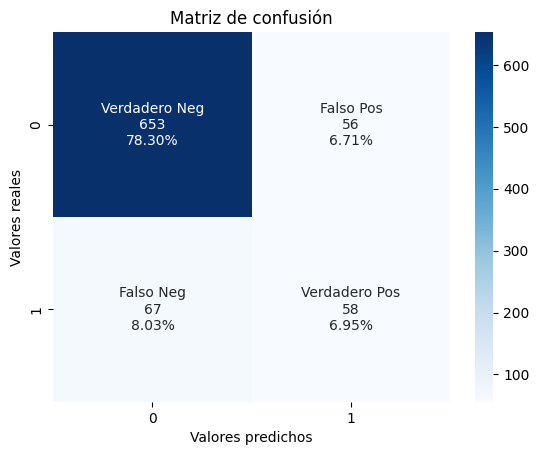

In [ ]:
cuadro_matriz_confusion(confusion)

In [63]:
resumen_metricas(confusion, y_test)

NameError: name 'resumen_metricas' is not defined

**Precisión (Accuracy)**: Naive Bayes tiene una precisión intermedia en comparación con KNearestNeighbours (88.97%) y Regresión Logística (78.06%).<br>
**Sensibilidad (Recall)**: Naive Bayes tiene una sensibilidad más baja que Regresión Logística (79.2%) pero mayor que KNearestNeighbours (28.8%).<br>
**Especificidad**: Naive Bayes muestra una especificidad similar a KNearestNeighbours (99.58%) y superior a Regresión Logística (77.86%).<br>
**Valor Predictivo Positivo (PPV)**: Naive Bayes tiene un valor predictivo positivo más bajo que KNearestNeighbours (92.31%) pero mayor que Regresión Logística (38.67%).<br>

Naive Bayes muestra una precisión y especificidad competitivas, pero una sensibilidad relativamente baja en comparación con los otros modelos.
En términos de valor predictivo positivo, Naive Bayes se encuentra entre KNearestNeighbours y Regresión Logística.<br>
Dependiendo de la importancia relativa de las métricas y los objetivos del problema, la elección del modelo puede variar. Si se valora la sensibilidad y la capacidad de identificar correctamente la clase positiva, KNearestNeighbours podría ser preferible. Si se busca un equilibrio entre precisión y especificidad, Naive Bayes podría ser una opción adecuada.


## Con validación cruzada

Una forma de determinar la fiabilidad de los modelos es la validacion cruzada.
Este sistema hace varias particiones de los datos para fijar train y test.

In [59]:
gnb = GaussianNB()

Bayes = gnb.fit(X, y)
predicciones = gnb.predict(X)
accuracy_score(y, predicciones)

NameError: name 'GaussianNB' is not defined

In [ ]:
print(len(predicciones))

3333


In [ ]:
cross_val_score(Bayes, X, y, cv=10)

array([0.8502994 , 0.86227545, 0.85928144, 0.84984985, 0.86186186,
       0.86786787, 0.89489489, 0.88588589, 0.85885886, 0.85585586])

In [ ]:
cross_val_score(Bayes, X, y, cv=10, scoring='precision')

array([0.48888889, 0.52830189, 0.51785714, 0.47826087, 0.52083333,
       0.54761905, 0.62745098, 0.61904762, 0.50980392, 0.5       ])

In [ ]:
cross_val_score(Bayes, X, y, cv=10, scoring='recall')

array([0.44897959, 0.57142857, 0.59183673, 0.45833333, 0.52083333,
       0.47916667, 0.66666667, 0.54166667, 0.54166667, 0.54166667])

# Árbol de decisión

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [64]:
# Árboles de decisión
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from six import StringIO

In [73]:
modelo = tree.DecisionTreeClassifier(class_weight=None,
                                     criterion='gini',
                                     max_depth=6,
                                     max_features=None,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_samples_leaf=3,
                                     min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     random_state=31,
                                     splitter='best')


In [69]:
y = datosfinal['Churn']
X = datosfinal.drop('Churn', axis = 1)
arbol = modelo.fit(X, y)

ValueError: could not convert string to float: 'KS'

In [71]:
cross_val_score(arbol, X, y, cv=10)

NameError: name 'arbol' is not defined

In [ ]:
cross_val_score(arbol, X, y, cv=10, scoring='precision')

array([0.89189189, 0.85      , 0.9375    , 0.85714286, 0.94594595,
       0.84615385, 0.86842105, 0.91428571, 0.88888889, 0.85106383])

In [ ]:
cross_val_score(arbol, X, y, cv=10, scoring='recall')

array([0.67346939, 0.69387755, 0.6122449 , 0.625     , 0.72916667,
       0.6875    , 0.6875    , 0.66666667, 0.66666667, 0.83333333])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
arbol = modelo.fit(X_train, y_train)
prediccion = arbol.predict(X_test)
accuracy_score(y_test, prediccion)

0.9460431654676259

In [ ]:
confusion = confusion_matrix(y_test, prediccion)

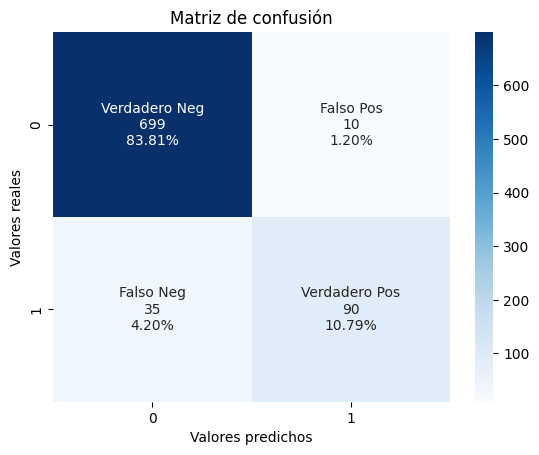

In [ ]:
cuadro_matriz_confusion(confusion)

In [ ]:
resumen_metricas(confusion, y_test)

Precisión (Accuracy): 0.9460431654676259
Sensibilidad (Recall): 0.72
Especificidad: 0.9858956276445698
Valor Predictivo Positivo (PPV): 0.9


**Precisión (Accuracy)**: El árbol de decisión tiene la mayor precisión entre todos los modelos, superando a KNearestNeighbours (88.97%), Naive Bayes (85.25%) y Regresión Logística (78.06%).<br>
**Sensibilidad (Recall)**: El árbol de decisión tiene una sensibilidad más alta que KNearestNeighbours (28.8%) y Naive Bayes (46.4%), pero más baja que Regresión Logística (79.2%).<br>
**Especificidad**: El árbol de decisión muestra la mayor especificidad, superando a KNearestNeighbours (99.58%), Naive Bayes (92.10%) y Regresión Logística (77.86%).<br>
**Valor Predictivo Positivo (PPV)**: El árbol de decisión tiene el segundo valor predictivo positivo más alto, después de KNearestNeighbours (92.31%), y supera a Naive Bayes (50.88%) y Regresión Logística (38.67%).<br>

El árbol de decisión se destaca por tener la mayor precisión y especificidad entre todos los modelos.<br>
En términos de sensibilidad, el árbol de decisión se encuentra en un punto intermedio, siendo superior a KNearestNeighbours y Naive Bayes, pero inferior a Regresión Logística.<br>
El árbol de decisión también muestra un alto valor predictivo positivo, lo que indica que cuando predice la clase positiva, es muy probable que sea correcta.

Con un árbol de decisión, además, es posible obtener las importancias de las características. Los árboles de decisión proporcionan naturalmente una medida de la importancia de cada característica en la toma de decisiones dentro del modelo. Las importancias de las características en un árbol de decisión se calculan según la reducción de la impureza que cada característica aporta al dividir los datos.

In [ ]:
importanciasarbol = pd.DataFrame(arbol.feature_importances_)
importanciasarbol.index = (X.columns)
print(importanciasarbol)

                       0
VMail Message   0.000681
Day Mins        0.041124
Day Calls       0.000000
Day Charge      0.272438
Eve Mins        0.014176
Eve Calls       0.000000
Eve Charge      0.113513
Night Mins      0.017528
Night Calls     0.002575
Night Charge    0.015167
Intl Mins       0.000000
Intl Calls      0.120454
Intl Charge     0.077886
CustServ Calls  0.145249
IntPlan         0.106370
VmailPlan       0.072838


También puedo obtener una representación gráfica de las separaciones de los datos realizadas por el árbol de decisión en función de los valores de corte.

[Text(0.6331018518518519, 0.9285714285714286, 'Day Charge <= 44.805\ngini = 0.245\nsamples = 2499\nvalue = [2141, 358]\nclass = 0'),
 Text(0.3726851851851852, 0.7857142857142857, 'CustServ Calls <= 3.5\ngini = 0.201\nsamples = 2333\nvalue = [2068, 265]\nclass = 0'),
 Text(0.24074074074074073, 0.6428571428571429, 'IntPlan <= 0.5\ngini = 0.145\nsamples = 2145\nvalue = [1976, 169]\nclass = 0'),
 Text(0.14814814814814814, 0.5, 'Day Mins <= 223.25\ngini = 0.093\nsamples = 1950\nvalue = [1855, 95]\nclass = 0'),
 Text(0.07407407407407407, 0.35714285714285715, 'Eve Mins <= 341.15\ngini = 0.053\nsamples = 1673\nvalue = [1627, 46]\nclass = 0'),
 Text(0.037037037037037035, 0.21428571428571427, 'VMail Message <= 47.5\ngini = 0.051\nsamples = 1667\nvalue = [1623, 44]\nclass = 0'),
 Text(0.018518518518518517, 0.07142857142857142, 'gini = 0.05\nsamples = 1662\nvalue = [1619, 43]\nclass = 0'),
 Text(0.05555555555555555, 0.07142857142857142, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = 0'),
 Text

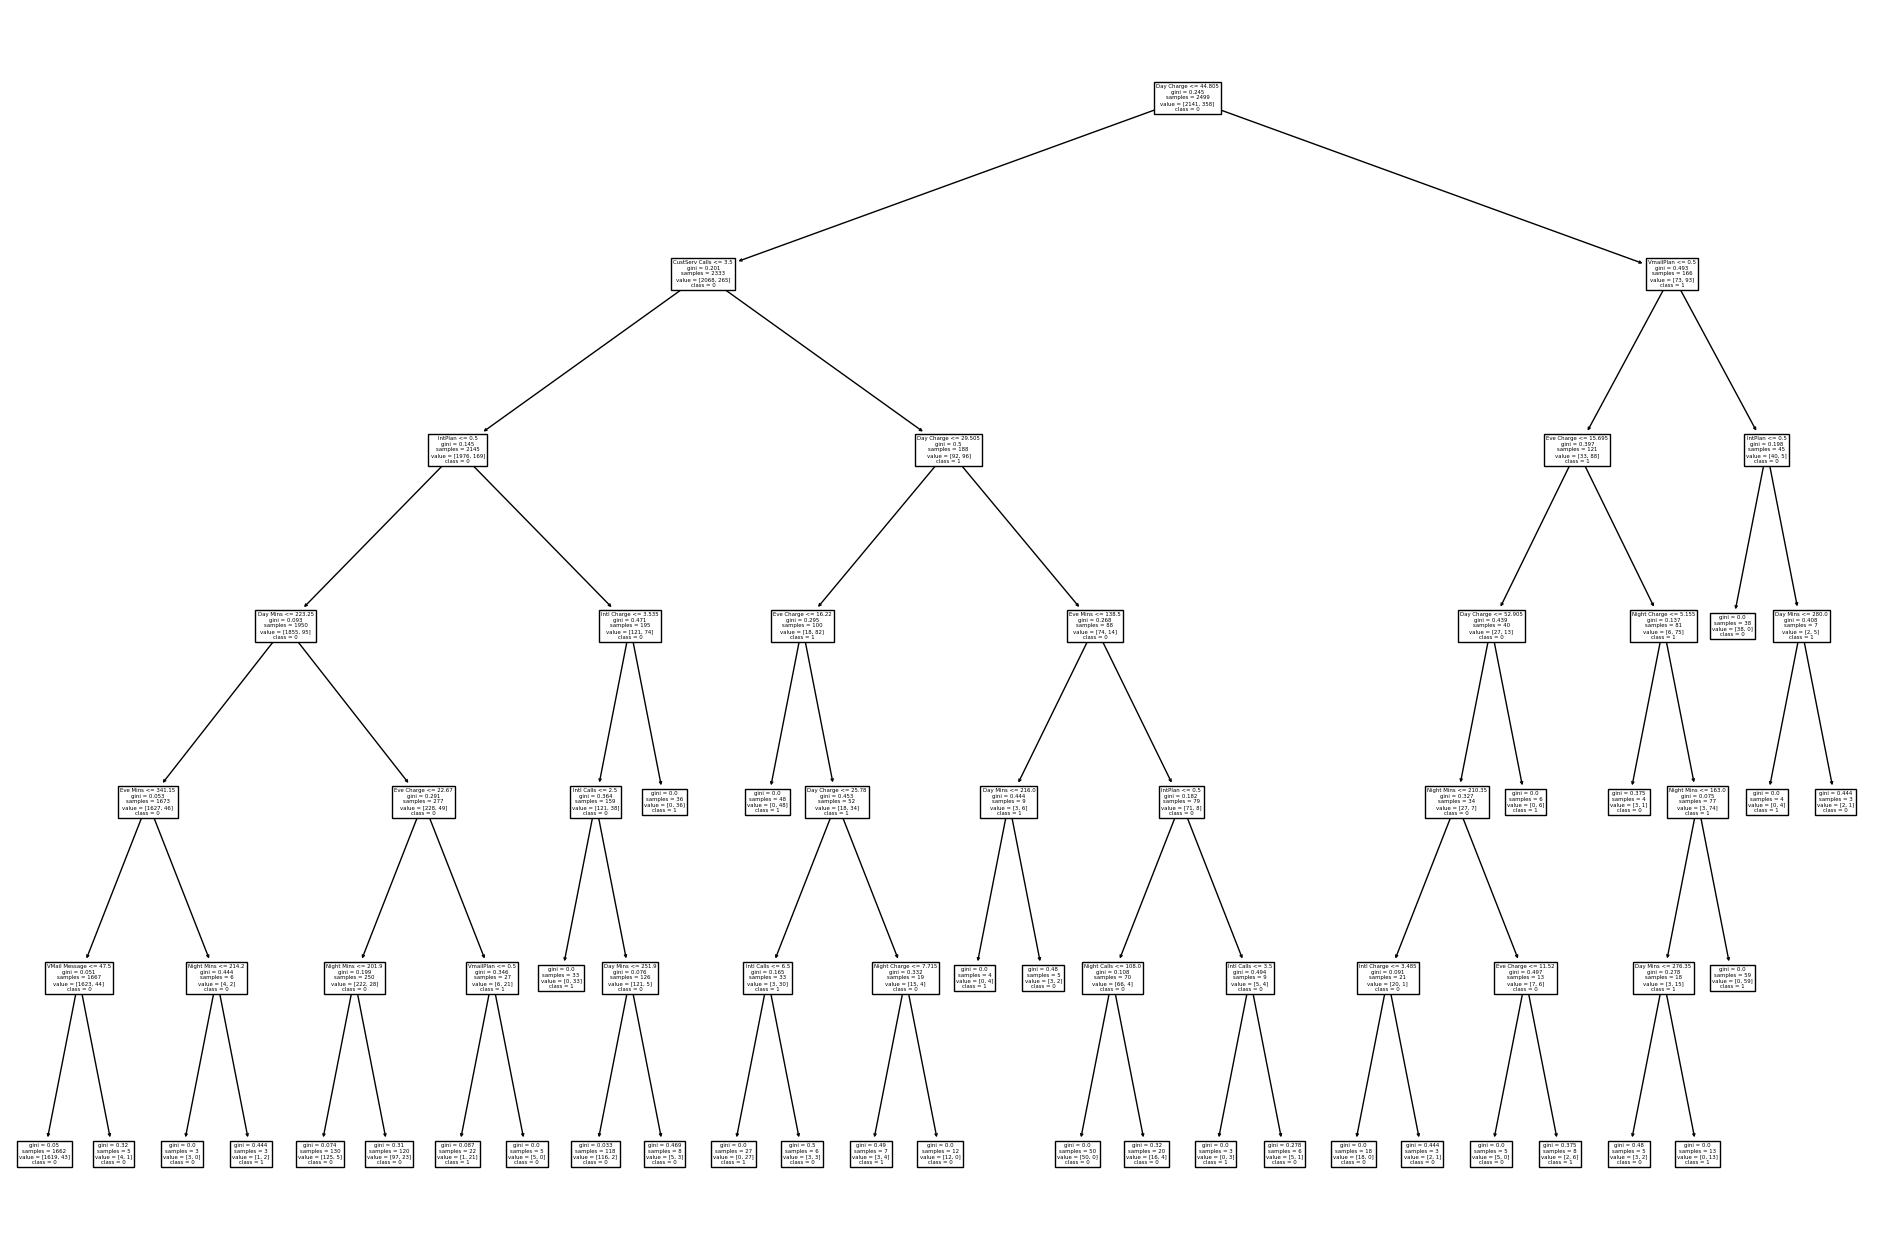

In [ ]:
plt.figure(figsize=(24,16))

tree.plot_tree(arbol.fit(X_train, y_train), feature_names=X.columns,
               class_names=['0', '1'], filled=False)

# XGBoost

XGBoost (eXtreme Gradient Boosting) es un algoritmo de aprendizaje automático supervisado basado en árboles de decisión que ha ganado mucha popularidad en los últimos años.<br>

Algunas de las principales características y ventajas de XGBoost son:

**Rendimiento superior:** XGBoost ha demostrado resultados de estado del arte en una gran variedad de problemas de machine learning, superando a otros algoritmos en muchas competiciones.

**Flexibilidad:** Puede manejar una variedad de tipos de datos y tareas de predicción, incluyendo clasificación, regresión y ranking. Admite personalización, permitiendo a los usuarios definir sus propias funciones de objetivo y evaluación.

**Manejo inteligente de datos faltantes:** XGBoost tiene una forma inteligente de manejar los datos faltantes, permitiendo construir modelos precisos incluso cuando los datos son incompletos.

**Escalabilidad y paralelización**: XGBoost puede escalar a grandes conjuntos de datos y es compatible con una variedad de plataformas. Además, permite el procesamiento paralelo utilizando múltiples núcleos de CPU o incluso GPUs, lo que acelera significativamente el entrenamiento.

Documentación: https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [11]:
import xgboost as xgb
# conda install -c anaconda py-xgboost

In [12]:
modelo = xgb.XGBClassifier(base_score=0.5,
                           colsample_bylevel=1,
                           colsample_bytree=1,
                           gamma=0,
                           learning_rate=0.05,
                           max_delta_step=0,
                           max_depth=5,
                           min_child_weight=1,
                           missing=1,
                           n_estimators=1000,
                           objective='binary:logistic',
                           reg_alpha=0,
                           reg_lambda=1,
                           scale_pos_weight=1,
                           seed=0,
                           verbosity=0,
                           subsample=1)

In [13]:
XGBoost = modelo.fit(X_train, y_train)
prediccion = XGBoost.predict(X_test)
accuracy_score(y_test, prediccion)

NameError: name 'X_train' is not defined

In [ ]:
confusion = confusion_matrix(y_test, prediccion)

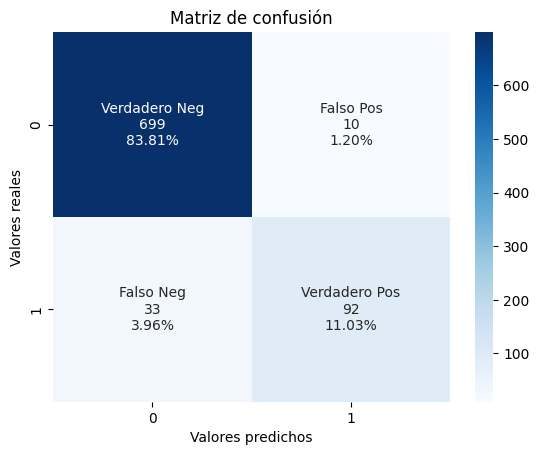

In [ ]:
cuadro_matriz_confusion(confusion)

In [ ]:
resumen_metricas(confusion, y_test)

Precisión (Accuracy): 0.9484412470023981
Sensibilidad (Recall): 0.736
Especificidad: 0.9858956276445698
Valor Predictivo Positivo (PPV): 0.9019607843137255


**Precisión (Accuracy)**: El modelo XGBoost tiene la mayor precisión en comparación con Regresión Logística (78.06%), KNearestNeighbours (88.97%), Naive Bayes (85.25%) y Árbol de Decisión (93.41%).<br>
**Sensibilidad (Recall)**: XGBoost tiene una sensibilidad más alta que Regresión Logística, Naive Bayes y Árbol de Decisión, pero ligeramente menor que KNearestNeighbours.<br>
**Especificidad**: XGBoost muestra la mayor especificidad entre todos los modelos, superando a Regresión Logística, Naive Bayes, KNearestNeighbours y Árbol de Decisión.<br>
**Valor Predictivo Positivo (PPV)**: XGBoost tiene un valor predictivo positivo alto, solo superado por KNearestNeighbours, pero mejor que Regresión Logística, Naive Bayes y Árbol de Decisión.<br>


El modelo XGBoost destaca por su alta precisión, especificidad y valor predictivo positivo, lo que indica su capacidad para predecir con precisión tanto las clases positivas como negativas.
Aunque la sensibilidad es ligeramente menor que la de KNearestNeighbours, el equilibrio entre precisión y sensibilidad hace que XGBoost sea un modelo muy sólido en términos de rendimiento general.
En general, el modelo XGBoost supera a los otros modelos en la mayoría de las métricas evaluadas, lo que lo posiciona como una opción muy efectiva para este problema específico.

In [ ]:
cross_val_score(XGBoost, X, y, cv=10)
cross_val_score(XGBoost, X, y, cv=10, scoring='precision')
cross_val_score(XGBoost, X, y, cv=10, scoring='recall')

array([0.69387755, 0.75510204, 0.75510204, 0.66666667, 0.8125    ,
       0.79166667, 0.79166667, 0.6875    , 0.6875    , 0.85416667])

También con XGBoost puedo obtener una medida de la importancia de las características a la hora de decidir si esa característica es clave o no para el abandono del cliente

In [ ]:
importanciasxgb = pd.DataFrame(XGBoost.feature_importances_)
importanciasxgb.index = (X.columns)
importanciasxgb

,0
VMail Message,0.124158
Day Mins,0.105481
Day Calls,0.029668
Day Charge,0.000000
Eve Mins,0.076390
Eve Calls,0.030431
Eve Charge,0.042531
Night Mins,0.046019
Night Calls,0.032417
Night Charge,0.034635


from matplotlib import pyplot as plt
importanciasxgb[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
importanciasxgb[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)